In [ ]:
! pip install chromadb

In [ ]:
import os
import tensorflow as tf
import numpy as np
import chromadb
import uuid
import matplotlib.pyplot as plt

# Load the model

In [ ]:
os.chdir('/content/drive/MyDrive/Signature similarity search')

In [ ]:
original_model = tf.keras.models.load_model('Model256.keras')
original_model.trainable = False
original_model.summary()

print()

embedding_model = tf.keras.models.Sequential(
    original_model.layers[:-1]
)
embedding_model.trainable = False
embedding_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_128 (Functional) │ (None, 4, 4, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 256)            │     4,195,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,620,036 (44.33 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,424,705 (28.32 MB)

 Optimizer params: 4,195,331 (16.00 MB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_128 (Functional) │ (None, 4, 4, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 256)            │     4,195,584 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,424,448 (28.32 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,424,448 (28.32 MB)

In [ ]:
embedding_model.input_shape

(None, 128, 128, 3)

# Generate embedding for one image

In [ ]:
os.chdir('/content/drive/MyDrive/Signature similarity search/samples')

In [ ]:
img = tf.keras.preprocessing.image.load_img('1_G2.png', target_size=(128, 128))

img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0

# Add batch dimension
img_array = np.expand_dims(img_array, axis=0)
img_array.shape

(1, 128, 128, 3)

In [ ]:
embedding_model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step


array([[1.6096683 , 0.        , 0.03546023, 0.8210659 , 0.        ,
        0.39747286, 1.1358433 , 0.        , 0.9375305 , 0.9717709 ,
        1.4012468 , 0.7919323 , 0.        , 0.        , 0.8531177 ,
        0.        , 0.4522071 , 2.1785793 , 0.6199825 , 0.        ,
        0.36798847, 0.97362125, 0.        , 0.75764024, 0.        ,
        0.5984283 , 1.471792  , 0.        , 0.5497825 , 1.4665542 ,
        1.1148376 , 0.        , 0.        , 0.13431764, 0.5980858 ,
        0.        , 0.        , 0.02132177, 0.62219167, 1.3213499 ,
        0.        , 0.9956056 , 1.3068943 , 0.        , 0.68978965,
        0.        , 0.        , 1.9510891 , 0.38194752, 0.9082117 ,
        1.0027487 , 1.0174874 , 0.6683713 , 1.3691936 , 0.        ,
        1.046447  , 0.5698886 , 0.00346226, 0.5851047 , 1.1530797 ,
        2.4219859 , 0.        , 0.        , 0.12898552, 0.892571  ,
        0.        , 0.82117796, 1.4047039 , 0.        , 0.        ,
        0.10876238, 0.        , 0.        , 0.  

# Generate augmented batch from one reference image

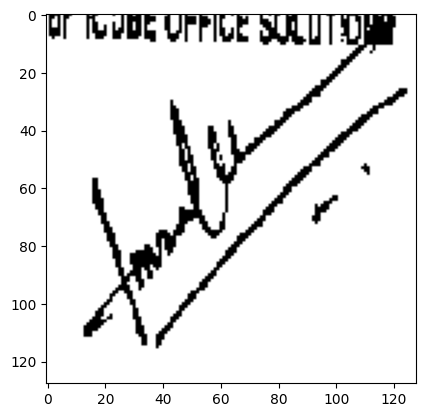

In [ ]:
plt.imshow(img_array[0])

In [ ]:
train_validation_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # rescale=1./255,
    # validation_split=0.2,
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    # brightness_range = (0.8, 1.2), #Causing problem
    shear_range = 0.2,
    zoom_range = (0.8, 1.2),
    # channel_shift_range= 20, #Causing problem
    fill_mode = 'nearest'
)

Min: 0.0 Max: 1.0


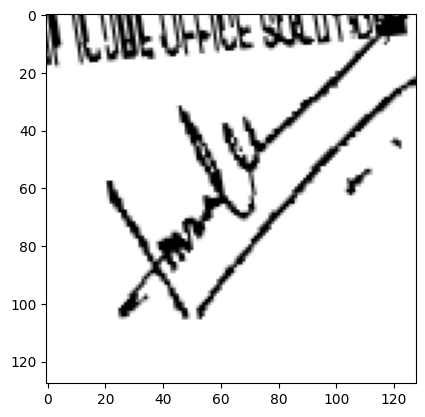

In [ ]:
augmented_iterator = train_validation_data_generator.flow(img_array, batch_size=1)

augmented_image = next(augmented_iterator)[0]
print("Min:", augmented_image.min(), "Max:", augmented_image.max())
plt.imshow(augmented_image)

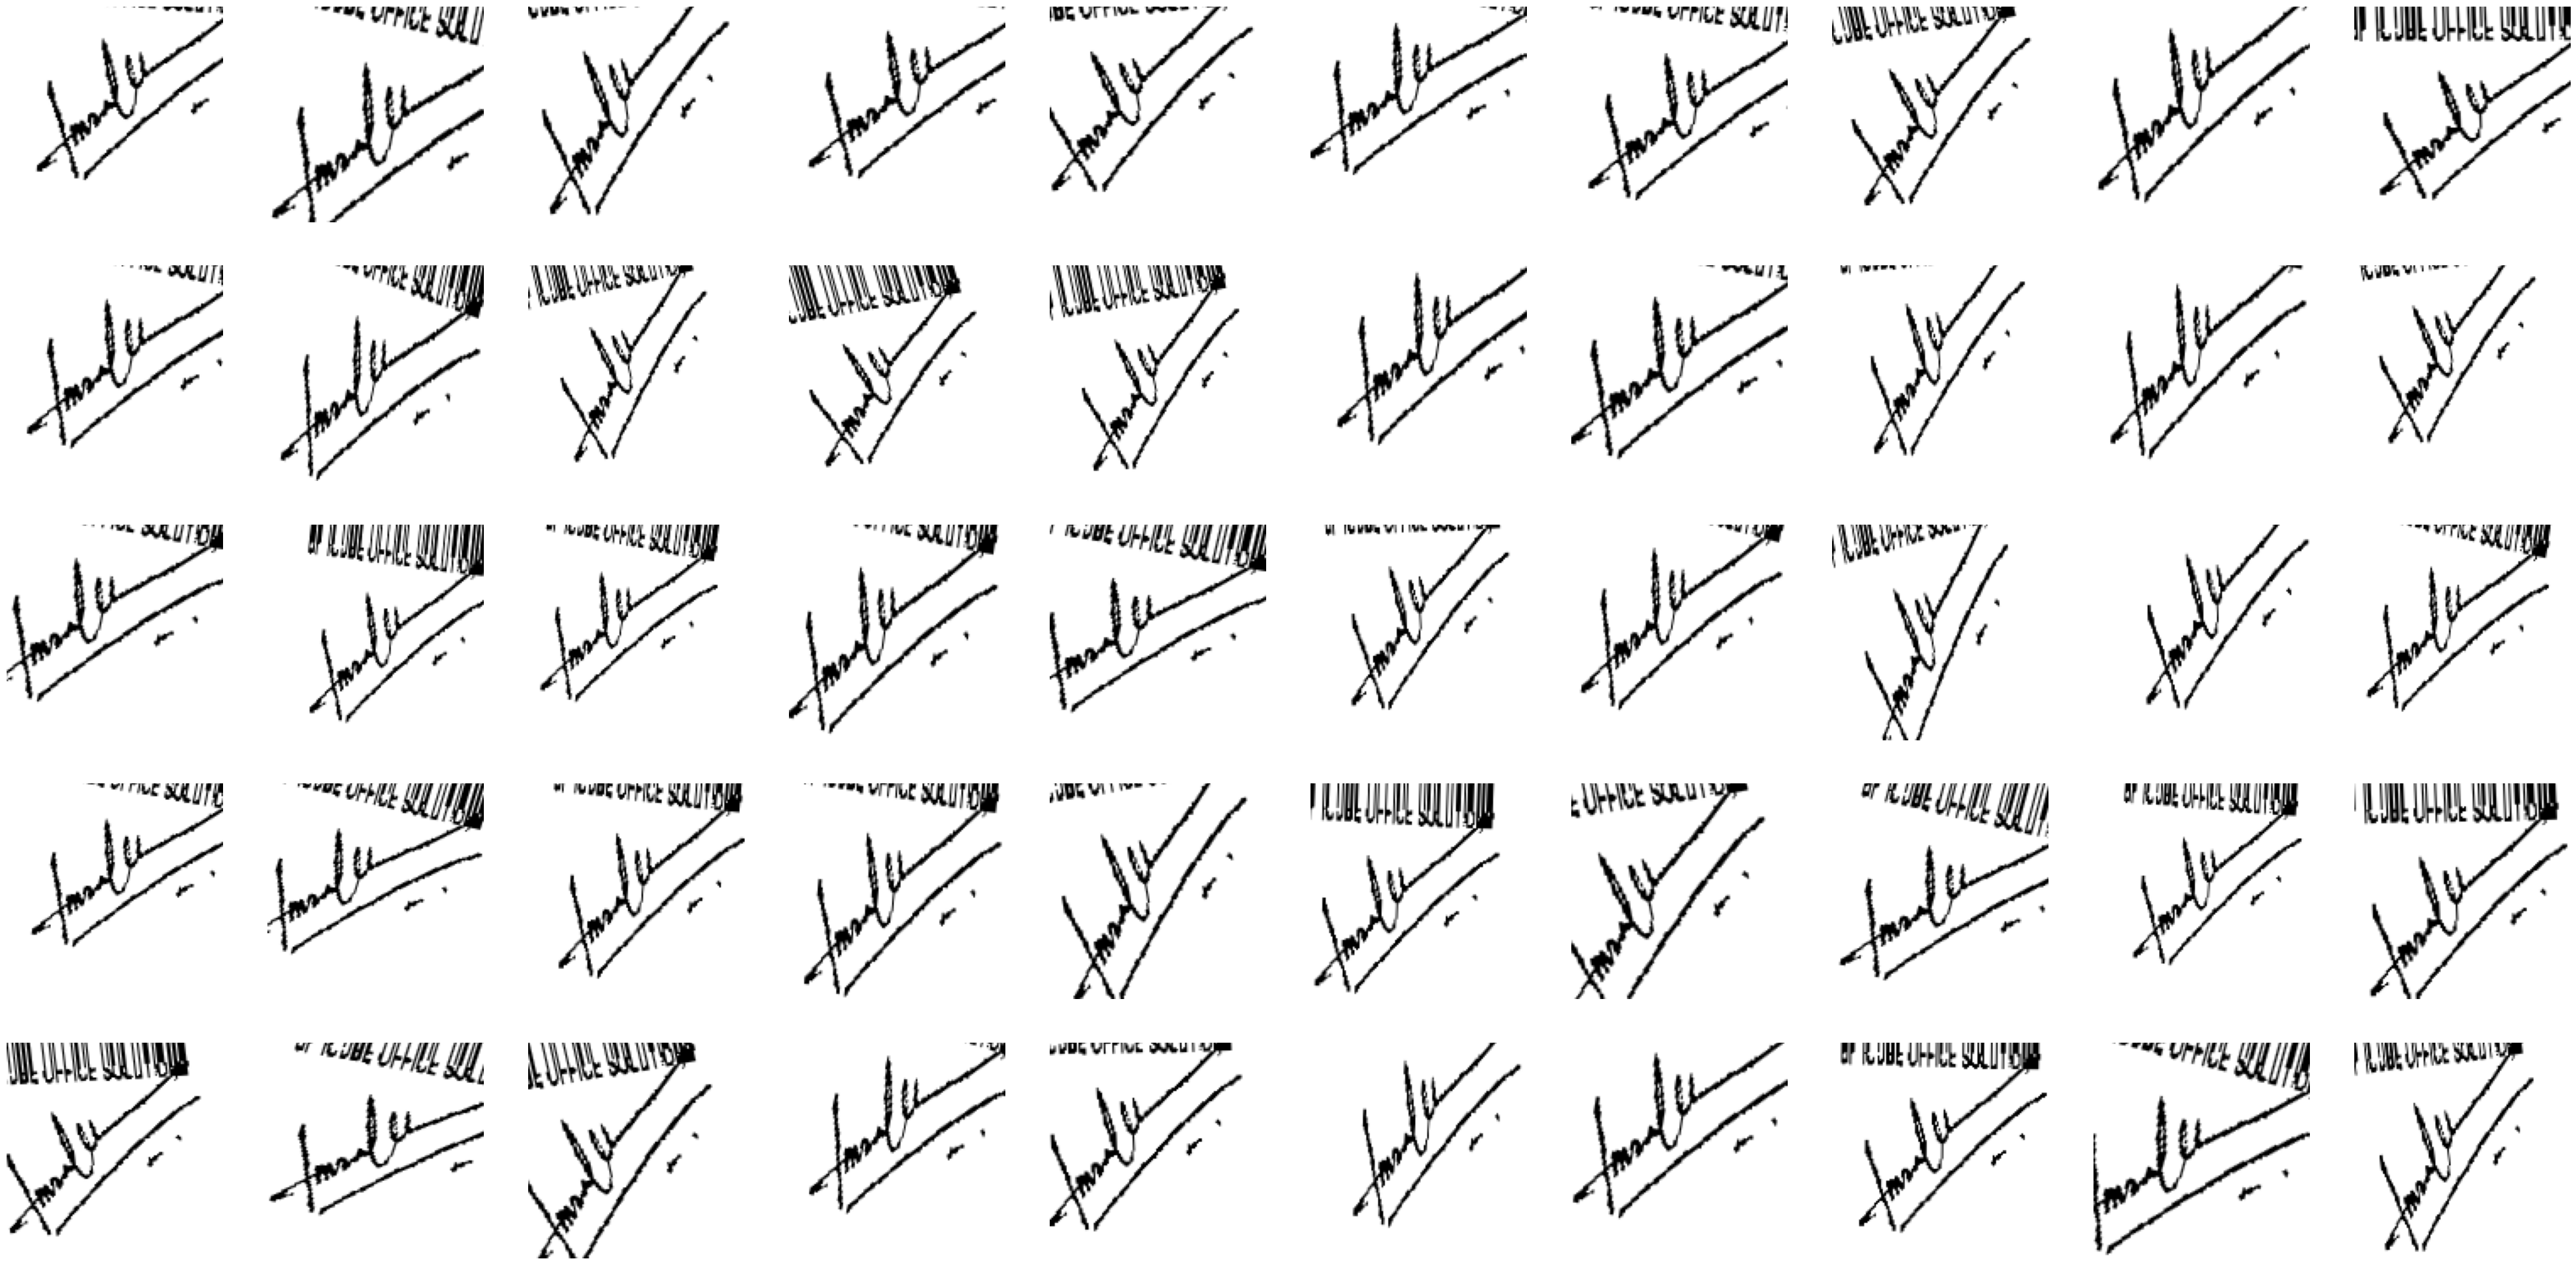

In [ ]:
augmented_batch = [next(augmented_iterator)[0] for _ in range(50)]

plt.figure(figsize=(50, 50))
for i in range(50):
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(augmented_batch[i])
    plt.axis("off")

# Generate batch embedding

In [ ]:
augmented_batch = np.array(augmented_batch)
augmented_batch.shape

(50, 128, 128, 3)

In [ ]:
embedding_batch = embedding_model.predict(augmented_batch)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step


# Add batch to Chroma

In [ ]:
# Chroma expects embeddings as standard Python-native types

embedding_list = [arr.tolist() for arr in embedding_batch]

In [ ]:
#os.chdir('/content/drive/MyDrive/Signature similarity search')
#os.chdir('/content')

'''
Getting errors with: chromadb.PersistentClient(path="./chroma_Model32_cosine")

  Error getting collection: Failed to get segments
  Error in compaction: Error purging logs
'''

# Delete the old persistent directories
!rm -rf ./chroma_*

In [ ]:
chroma_client = chromadb.Client()

In [ ]:
# chroma_client.delete_collection(name="049") #Note

collection = chroma_client.get_or_create_collection(name="001")#metadata={"hnsw:space": "cosine"}

collection.add(
    ids = [str(uuid.uuid4()) for _ in range(len(embedding_list))],
    #metadatas=[{"timestamp": "user123" "Not augmented"}]
    embeddings = embedding_list
)

collection.add(
    ids = [str(uuid.uuid4())],
    #metadatas=[{"timestamp": "user123" "augmented"}]
    embeddings = [embedding_model.predict(img_array)[0]]
)

results = collection.get(include=["embeddings", "metadatas"])
embeddings = results["embeddings"]
len(embeddings)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


51

# Similarity search

In [ ]:
os.chdir('/content/drive/MyDrive/Signature similarity search/samples')

query_images = ("1_G1.png", "1_F2.png")

for query_image_name in query_images:
  print(f"Querying image: {query_image_name}")
  img = tf.keras.preprocessing.image.load_img(query_image_name, target_size=(128, 128))

  img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0

  img_array = np.expand_dims(img_array, axis=0)

  query_embedding = embedding_model.predict(img_array)[0]

  results = collection.query(
      query_embeddings = [query_embedding],
      n_results = 1,
      include = ["distances", "metadatas"]
  )

  min_distance = results["distances"][0][0]

  print(f"Minimum distance: {min_distance}")

Querying image: 1_G1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Minimum distance: 54.64545440673828
Querying image: 1_F2.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Minimum distance: 50.0791130065918


# Building vector database from genuine training data

In [ ]:
for collection in chroma_client.list_collections():
  chroma_client.delete_collection(name=collection.name)

In [ ]:
os.chdir('/content/drive/MyDrive/Datasets/signature-verification-dataset/sign_data/train')

X_train = []
Y_train = []

for dir in os.listdir():
  query_image_names = os.listdir(dir)
  for query_image_name in query_image_names:
    query_image_name = os.path.join(dir, query_image_name)
    img = tf.keras.preprocessing.image.load_img(query_image_name, target_size=(128, 128))

    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0

    img_array = np.expand_dims(img_array, axis=0)

    #query_embedding = embedding_model.predict(img_array)[0]

    augmented_iterator = train_validation_data_generator.flow(img_array, batch_size=1)

    augmented_batch = [next(augmented_iterator)[0] for _ in range(50)]
    augmented_batch = np.array(augmented_batch)

    embedding_batch = embedding_model.predict(augmented_batch)

    embedding_list = [arr.tolist() for arr in embedding_batch]

    collection = chroma_client.get_or_create_collection(name=dir)#metadata={"hnsw:space": "cosine"}

    collection.add(
      ids = [str(uuid.uuid4()) for _ in range(len(embedding_list))],
      #metadatas=[{"timestamp": "user123" "augmented?"}]
      embeddings = embedding_list
    )

    X_train.extend(embedding_list)
    if dir.endswith('_forged'):
      label = 1
    else:
      label = 0
    Y_train.extend([label for _ in range(len(embedding_list))])

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 358ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 456ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 972ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 614ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 438ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 460ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 276ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 253ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 303ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 443ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 481ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 253ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 276ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 277ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
chroma_client.list_collections()
for collection in chroma_client.list_collections():
  print(f"Collection: {collection.name} \t\t Count: {collection.count()}")

Collection: 062 		 Count: 600
Collection: 029 		 Count: 600
Collection: 016_forg 		 Count: 800
Collection: 034 		 Count: 600
Collection: 051 		 Count: 600
Collection: 046 		 Count: 600
Collection: 036_forg 		 Count: 600
Collection: 003 		 Count: 1200
Collection: 004 		 Count: 1200
Collection: 019_forg 		 Count: 600
Collection: 038_forg 		 Count: 600
Collection: 001 		 Count: 1200
Collection: 012_forg 		 Count: 600
Collection: 060 		 Count: 600
Collection: 059_forg 		 Count: 400
Collection: 009_forg 		 Count: 600
Collection: 029_forg 		 Count: 600
Collection: 039 		 Count: 600
Collection: 062_forg 		 Count: 600
Collection: 040 		 Count: 600
Collection: 068_forg 		 Count: 400
Collection: 065 		 Count: 600
Collection: 030_forg 		 Count: 600
Collection: 054 		 Count: 600
Collection: 021 		 Count: 600
Collection: 009 		 Count: 1200
Collection: 022_forg 		 Count: 800
Collection: 055 		 Count: 600
Collection: 045 		 Count: 600
Collection: 038 		 Count: 600
Collection: 049 		 Count: 600
Collec

In [ ]:
os.chdir('/content/drive/MyDrive/Datasets/signature-verification-dataset/sign_data/test')

user_distances = {}

X_test = []
Y_test = []

for dir in os.listdir():
  query_image_names = os.listdir(dir)
  for query_image_name in query_image_names:
    query_image_name = os.path.join(dir, query_image_name)
    img = tf.keras.preprocessing.image.load_img(query_image_name, target_size=(128, 128))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    query_embedding = embedding_model.predict(img_array)[0]

    if dir.endswith("_forg"):
      collection_name = dir.replace("_forg", "")
    else:
      collection_name = dir

    collection = chroma_client.get_collection(name=collection_name)
    results = collection.query(
      query_embeddings = [query_embedding],
      n_results = 1,
      include = ["distances", "metadatas"]
    )
    min_distance = results["distances"][0][0]

    user_distances.setdefault(dir, {}).setdefault("against_genuine", []).append(min_distance)

    X_test.append(query_embedding)
    if dir.endswith('_forged'):
      label = 1
    else:
      label = 0
    Y_test.append(label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━

In [ ]:
user_distances['049']

{'against_genuine': [26.19108009338379,
  24.950563430786133,
  29.65856170654297,
  32.04326248168945,
  22.788705825805664,
  33.51948547363281,
  24.15577507019043,
  16.792469024658203,
  15.47439956665039,
  27.358386993408203,
  20.14618492126465,
  22.40769386291504]}

In [ ]:
for user in user_distances:
  print(f"User: {user} \t\t Min against genuine: {min(user_distances[user]['against_genuine'])} \t\t Max against genuine: {max(user_distances[user]['against_genuine'])}")
  # print(f"User: {user} \t\t Min against forged: {min(user_distances[user]['against_forged'])} \t\t Max against forged: {max(user_distances[user]['against_forged'])}")
  print()

User: 049 		 Min against genuine: 15.47439956665039 		 Max against genuine: 33.51948547363281

User: 049_forg 		 Min against genuine: 107.1572265625 		 Max against genuine: 193.393310546875

User: 050 		 Min against genuine: 15.702239990234375 		 Max against genuine: 28.455095291137695

User: 050_forg 		 Min against genuine: 109.19640350341797 		 Max against genuine: 263.9666442871094

User: 051 		 Min against genuine: 24.89293670654297 		 Max against genuine: 51.870121002197266

User: 051_forg 		 Min against genuine: 171.06524658203125 		 Max against genuine: 400.5892333984375

User: 052 		 Min against genuine: 13.819973945617676 		 Max against genuine: 40.0787353515625

User: 052_forg 		 Min against genuine: 78.25724792480469 		 Max against genuine: 217.58395385742188

User: 053 		 Min against genuine: 13.331097602844238 		 Max against genuine: 32.358009338378906

User: 053_forg 		 Min against genuine: 71.13914489746094 		 Max against genuine: 188.9764404296875

User: 054 		 Min agai

# Clear Separation Between Classes

* There's a visible margin between the two groups — between the highest genuine and lowest forged values

* Genuine samples generally have low minimum distances, typically between 1.4 and 8.0, indicating high similarity to other genuine samples.

* Forged samples have much higher minimum distances, often between 11 and 29, suggesting they are dissimilar to genuine ones — which is expected.

* User 055_forg has the highest distance: 29.31, showing a very strong separation from genuine samples.

* User 060_forg is an outlier: its forged score (7.40) is lower than its genuine score (8.01) — this might indicate a false acceptance or a very skilled forgery.

* Users 053 and 054 have relatively close scores between genuine and forged samples, which could be borderline cases.

In [ ]:
threshold = 52

correct = 0
wrong = 0

for user in user_distances:
  for distance in user_distances[user]['against_genuine']:
    if distance < threshold:
      if user.endswith("_forg"):
        wrong += 1
      else:
        correct += 1
    else:
      if user.endswith("_forg"):
        correct += 1
      else:
        wrong += 1

print(f"Accuracy: {correct/(correct + wrong)}")


Accuracy: 1.0


# Next Steps to Strengthen It
Plot distributions of genuine vs forged distances to visualize overlap.

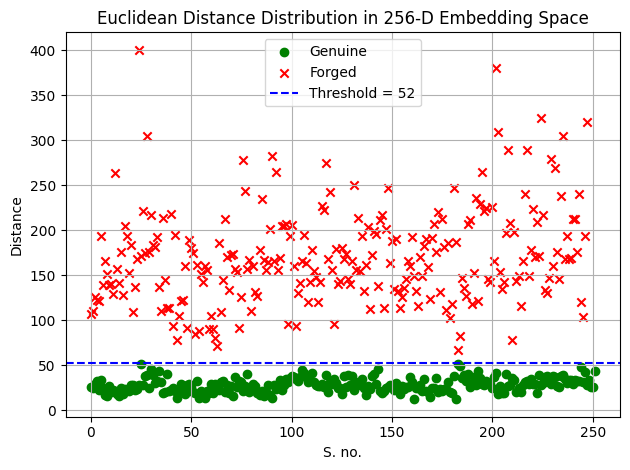

In [ ]:
genuine_temp = [user_distances[user]['against_genuine'] for user in user_distances if not user.endswith('_forg')]
genuine = [item for sublist in genuine_temp for item in sublist]
forged_temp = [user_distances[user]['against_genuine'] for user in user_distances if user.endswith('_forg')]
forged = [item for sublist in forged_temp for item in sublist]

x1 = range(len(genuine))
x2 = range(len(forged))

plt.scatter(x1, genuine, label='Genuine', marker='o', color='green')
plt.scatter(x2, forged, label='Forged', marker='x', color='red')

plt.axhline(y=threshold, color='blue', linestyle='--', linewidth=1.5, label=f'Threshold = {threshold}')

plt.xlabel('S. no.')
plt.ylabel('Distance')

title = 'Euclidean Distance Distribution in 256-D Embedding Space'

plt.title(title)
plt.legend()

plt.grid(True)
plt.tight_layout()

os.chdir('/content/drive/MyDrive/Signature similarity search')
plt.savefig(f'{title}.png', dpi=300)

plt.show()